In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
import random
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import pandas_profiling
from pandas_profiling.utils.cache import cache_file

In [2]:
df = pd.read_csv('../data/interim/salary_skill_cleaned.csv')

In [3]:
df.head()

,Unnamed: 0,occupation_onet,skill,importance,location,state,annual
0,0,Chief Executives,Reading Comprehension,4.12,Aguadilla-Isabela,PR,92200.0
1,1,Chief Executives,Reading Comprehension,4.12,Akron,OH,204420.0
2,2,Chief Executives,Reading Comprehension,4.12,Albany,GA,121260.0
3,3,Chief Executives,Reading Comprehension,4.12,Albany-Schenectady-Troy,NY,155870.0
4,4,Chief Executives,Reading Comprehension,4.12,Allentown-Bethlehem-Easton,PA,215910.0


In [4]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [5]:
df.rename(columns={'occupation_onet':'occupation', 'annual':'salary'}, inplace=True)

In [6]:
df.head()

,occupation,skill,importance,location,state,salary
0,Chief Executives,Reading Comprehension,4.12,Aguadilla-Isabela,PR,92200.0
1,Chief Executives,Reading Comprehension,4.12,Akron,OH,204420.0
2,Chief Executives,Reading Comprehension,4.12,Albany,GA,121260.0
3,Chief Executives,Reading Comprehension,4.12,Albany-Schenectady-Troy,NY,155870.0
4,Chief Executives,Reading Comprehension,4.12,Allentown-Bethlehem-Easton,PA,215910.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4774000 entries, 0 to 4773999
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   occupation  object 
 1   skill       object 
 2   importance  float64
 3   location    object 
 4   state       object 
 5   salary      float64
dtypes: float64(2), object(4)
memory usage: 218.5+ MB


In [8]:
# Annual mean salary across all occupations
all_mean = np.mean(df['salary'])
all_std = np.std(df['salary'])
all_mean, all_std

(61028.50821114369, 32704.41712789126)

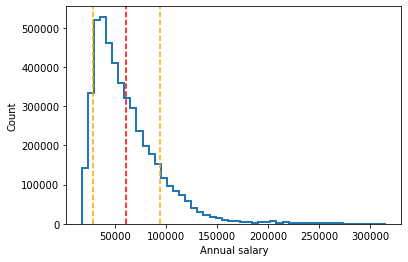

In [9]:
# Annual salary distribution for all occupations, with mean and std for all occupations
plt.hist(df['salary'], bins=50, histtype='step', linewidth = 2)
plt.axvline(x=all_mean, linestyle='--', color='red')
plt.axvline(x=all_mean - all_std, linestyle='--', color='orange')
plt.axvline(x=all_mean + all_std, linestyle='--', color='orange')
plt.xlabel('Annual salary')
plt.ylabel('Count');

In [10]:
occupations = df['occupation'].unique()
df['occupation'].nunique()

788

In [11]:
locations = df['location'].unique()
df['location'].nunique()

379

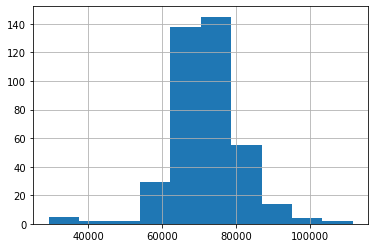

In [12]:
new_slice = df[['occupation', 'location', 'salary']]
new_slice = new_slice[~new_slice.duplicated()]
new_slice[new_slice['occupation']=='Accountants and Auditors'].salary.hist();

In [13]:
os = df.groupby('occupation')['salary'].describe()
os.head()

,count,mean,std,min,25%,50%,75%,max
occupation,,,,,,,,
Accountants and Auditors,13860.0,71805.277778,9863.620539,29210.0,66627.5,71495.0,76517.5,111680.0
Actuaries,2205.0,113659.365079,16774.664509,61750.0,107290.0,115730.0,123980.0,156910.0
Acute Care Nurses,13230.0,72973.783069,15181.970944,27160.0,65150.0,70025.0,76660.0,149200.0
Adapted Physical Education Specialists,3115.0,63093.483146,14022.145306,28170.0,54990.0,64020.0,71430.0,98040.0
Adhesive Bonding Machine Operators and Tenders,1575.0,37033.777778,4603.571001,28230.0,33530.0,37090.0,39530.0,52880.0


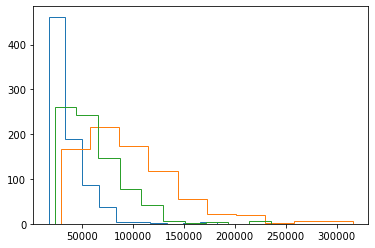

In [14]:
plt.hist(os['min'], histtype='step')
plt.hist(os['max'], histtype='step')
plt.hist(os['mean'], histtype='step');

In [15]:
ss=df.groupby('state')['salary'].describe()
ss.head()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AK,20860.0,72039.530201,31516.526027,24550.0,46557.5,69725.0,90020.0,240630.0
AL,126525.0,55418.735823,31268.225727,17440.0,33020.0,47620.0,67880.0,292110.0
AR,62755.0,53508.499721,29501.426893,19660.0,32930.0,45080.0,65500.0,247020.0
AZ,80605.0,58553.278333,30051.173346,25370.0,36760.0,49900.0,72180.0,279240.0
CA,362670.0,72027.821849,37267.193757,27710.0,42690.0,63030.0,92720.0,302040.0


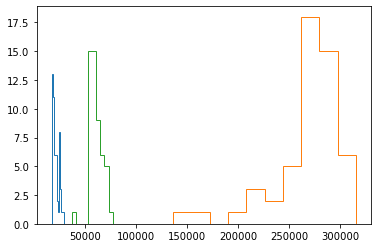

In [16]:
plt.hist(ss['min'], histtype='step')
plt.hist(ss['max'], histtype='step')
plt.hist(ss['mean'], histtype='step');

In [17]:
# Average income for across all occupations, by state
income_average_per_state = df.groupby('state')['salary'].mean()
total_mean=income_average_per_state.mean()

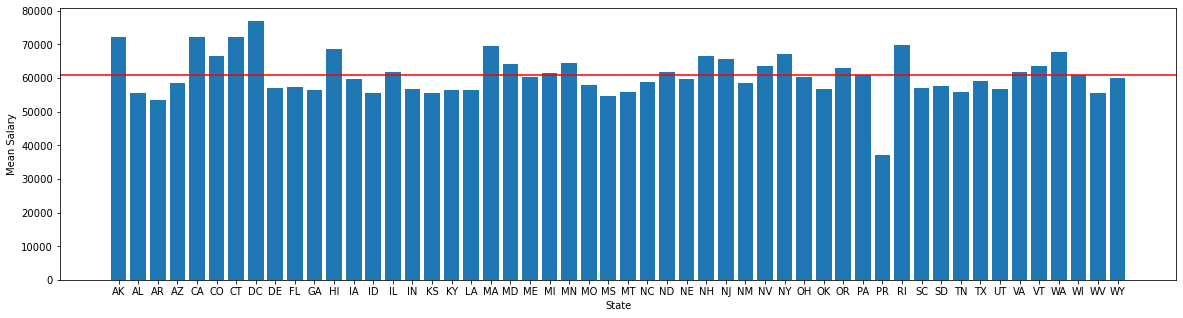

In [18]:
# Bar plot average income across all occupations by state with mean of all income represented with horizontal red line
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(income_average_per_state.index, income_average_per_state)
ax.axhline(y=total_mean, color='red')
ax.set_xlabel('State')
ax.set_ylabel('Mean Salary');

In [19]:
skills = df.pivot_table(values='importance',index=['occupation', 'salary'],columns='skill').reset_index()
skills.head()

skill,occupation,salary,Active Learning,Active Listening,Complex Problem Solving,Coordination,Critical Thinking,Equipment Maintenance,Equipment Selection,Installation,...,Science,Service Orientation,Social Perceptiveness,Speaking,Systems Analysis,Systems Evaluation,Technology Design,Time Management,Troubleshooting,Writing
0,Accountants and Auditors,29210.0,3.31,3.94,3.44,3.06,3.88,1.0,1.0,1.0,...,1.88,3.0,3.06,3.81,3.19,2.94,1.75,3.25,1.12,3.75
1,Accountants and Auditors,29630.0,3.31,3.94,3.44,3.06,3.88,1.0,1.0,1.0,...,1.88,3.0,3.06,3.81,3.19,2.94,1.75,3.25,1.12,3.75
2,Accountants and Auditors,31360.0,3.31,3.94,3.44,3.06,3.88,1.0,1.0,1.0,...,1.88,3.0,3.06,3.81,3.19,2.94,1.75,3.25,1.12,3.75
3,Accountants and Auditors,33480.0,3.31,3.94,3.44,3.06,3.88,1.0,1.0,1.0,...,1.88,3.0,3.06,3.81,3.19,2.94,1.75,3.25,1.12,3.75
4,Accountants and Auditors,33700.0,3.31,3.94,3.44,3.06,3.88,1.0,1.0,1.0,...,1.88,3.0,3.06,3.81,3.19,2.94,1.75,3.25,1.12,3.75


In [20]:
skills.describe().T

,count,mean,std,min,25%,50%,75%,max
skill,,,,,,,,
salary,129120.0,61700.368030,32823.700221,17300.00,37840.00,53740.00,77112.50,315830.00
Active Learning,129120.0,3.121423,0.486563,1.88,2.88,3.12,3.50,4.12
Active Listening,129120.0,3.632783,0.443758,2.00,3.19,3.75,4.00,5.00
Complex Problem Solving,129120.0,3.207605,0.500032,1.88,2.88,3.12,3.62,4.38
Coordination,129120.0,3.179494,0.392471,2.00,3.00,3.00,3.44,4.25
Critical Thinking,129120.0,3.510152,0.444279,2.25,3.12,3.62,3.88,4.88
Equipment Maintenance,129120.0,1.637968,0.816469,1.00,1.00,1.12,2.19,4.25
Equipment Selection,129120.0,1.646595,0.672999,1.00,1.00,1.50,2.12,3.75
Installation,129120.0,1.241363,0.532602,1.00,1.00,1.00,1.12,4.75


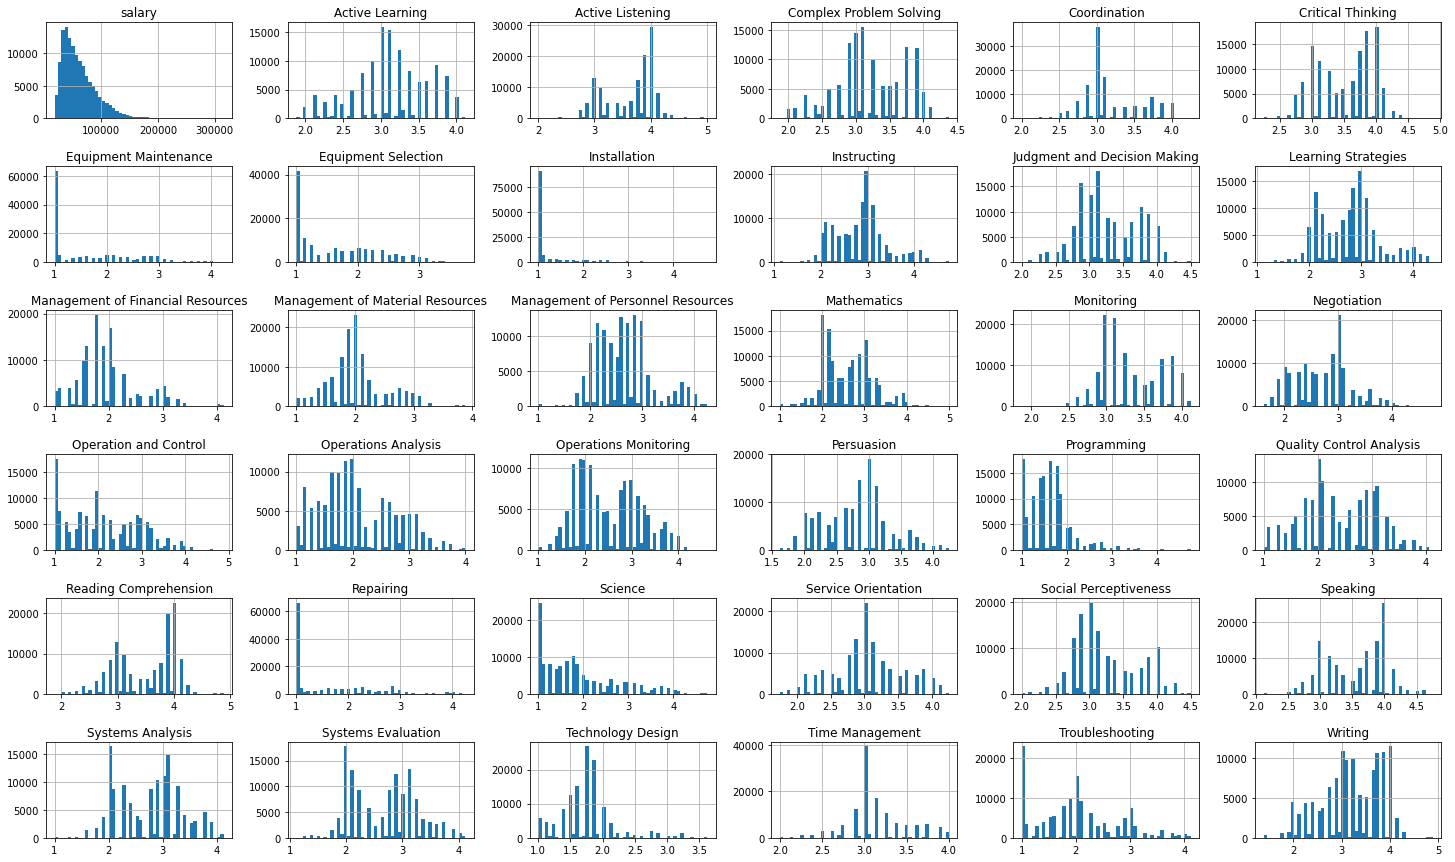

In [21]:
skills.hist(figsize=(25, 15), bins=50)
plt.subplots_adjust(hspace=0.5);

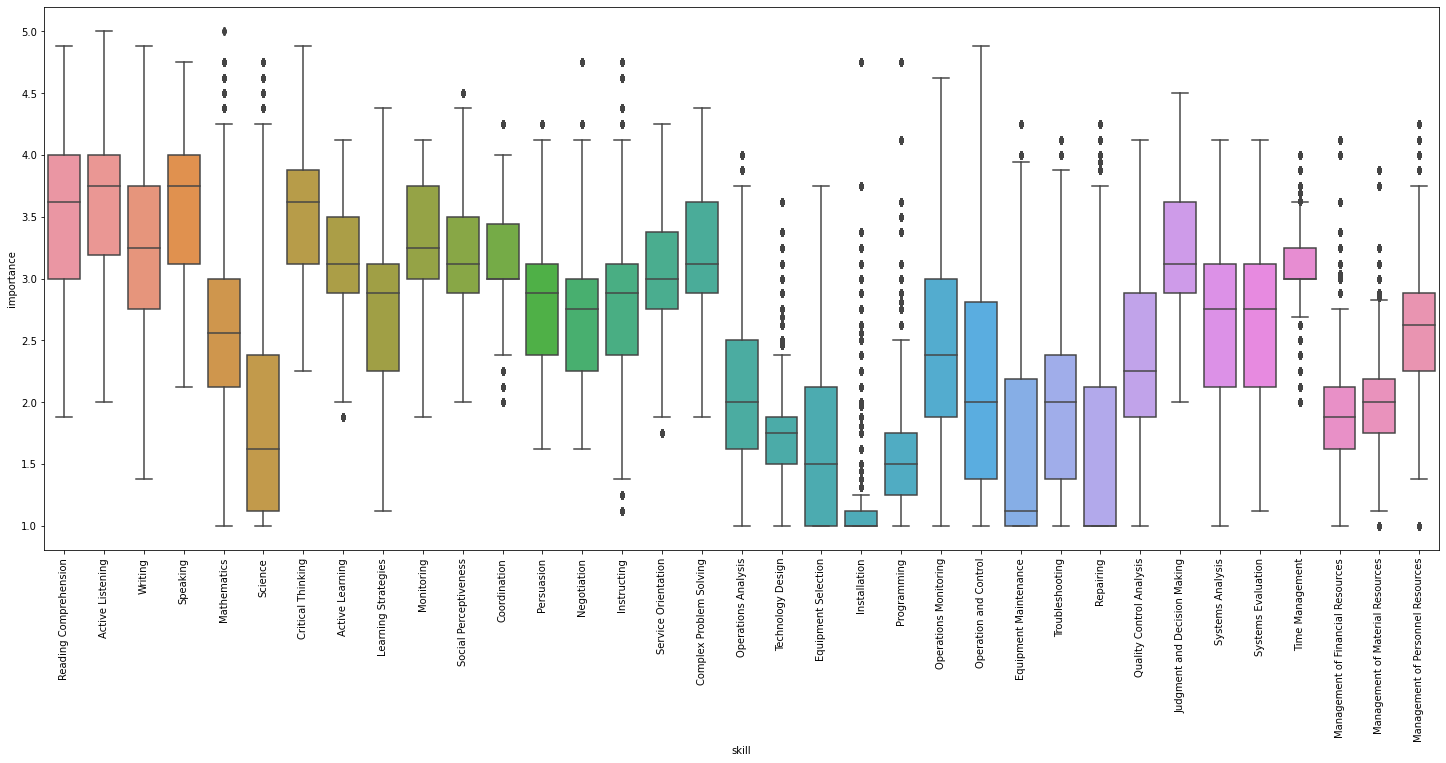

In [22]:
plt.subplots(figsize=(25,10))
sns.boxplot(x='skill', y='importance', data=df)
plt.xticks(rotation=90);

In [24]:
features = [x for x in skills.set_index('occupation').columns]

In [25]:
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'salary', data=skills.set_index('occupation'), alpha=0.5)
        ax.set(xlabel=col, ylabel='Salary')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

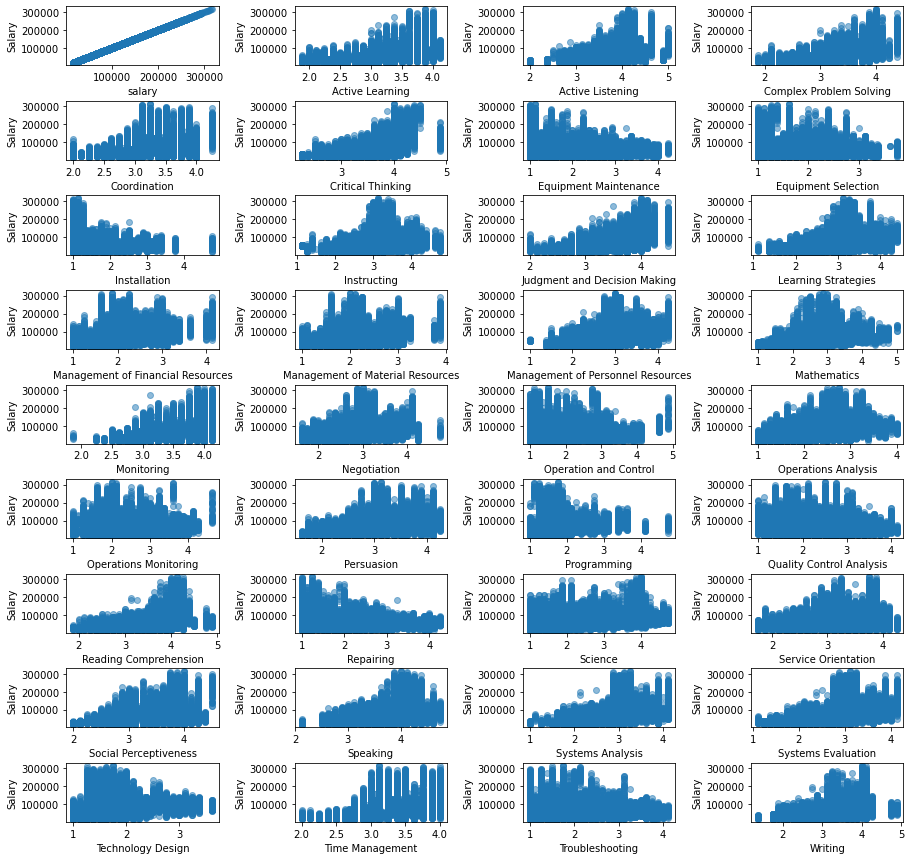

In [26]:
scatterplots(features, ncol=4, figsize=(15, 15));

In [27]:
skills.corr()

skill,salary,Active Learning,Active Listening,Complex Problem Solving,Coordination,Critical Thinking,Equipment Maintenance,Equipment Selection,Installation,Instructing,...,Science,Service Orientation,Social Perceptiveness,Speaking,Systems Analysis,Systems Evaluation,Technology Design,Time Management,Troubleshooting,Writing
skill,,,,,,,,,,,,,,,,,,,,,
salary,1.000000,0.626617,0.482024,0.665118,0.393059,0.669967,-0.165443,-0.086268,-0.071989,0.436006,...,0.519214,0.188652,0.344985,0.478425,0.633115,0.634021,0.380138,0.503223,-0.092374,0.565445
Active Learning,0.626617,1.000000,0.773431,0.843619,0.596446,0.853838,-0.321964,-0.235043,-0.140474,0.774215,...,0.555928,0.491785,0.634496,0.756161,0.770152,0.777323,0.410789,0.640549,-0.244326,0.826298
Active Listening,0.482024,0.773431,1.000000,0.712370,0.595595,0.779052,-0.561677,-0.501697,-0.342960,0.655807,...,0.368585,0.654544,0.740075,0.908890,0.629044,0.619470,0.236280,0.602781,-0.502313,0.830082
Complex Problem Solving,0.665118,0.843619,0.712370,1.000000,0.557480,0.880509,-0.225577,-0.138591,-0.053442,0.664271,...,0.594944,0.360484,0.519939,0.693876,0.846081,0.853107,0.540741,0.633260,-0.130359,0.789412
Coordination,0.393059,0.596446,0.595595,0.557480,1.000000,0.587677,-0.331306,-0.270793,-0.221354,0.652206,...,0.197607,0.593782,0.746325,0.643236,0.546807,0.576156,0.169557,0.716509,-0.247355,0.521124
Critical Thinking,0.669967,0.853838,0.779052,0.880509,0.587677,1.000000,-0.294476,-0.203512,-0.118456,0.675746,...,0.600276,0.398557,0.579076,0.754421,0.836980,0.829034,0.465480,0.632293,-0.198177,0.837932
Equipment Maintenance,-0.165443,-0.321964,-0.561677,-0.225577,-0.331306,-0.294476,1.000000,0.906419,0.689885,-0.291093,...,0.017964,-0.504247,-0.511011,-0.572958,-0.182953,-0.195275,0.152740,-0.231409,0.878325,-0.451806
Equipment Selection,-0.086268,-0.235043,-0.501697,-0.138591,-0.270793,-0.203512,0.906419,1.000000,0.681986,-0.216925,...,0.137265,-0.469279,-0.476679,-0.511916,-0.086363,-0.099868,0.315213,-0.194971,0.869144,-0.399508
Installation,-0.071989,-0.140474,-0.342960,-0.053442,-0.221354,-0.118456,0.689885,0.681986,1.000000,-0.150871,...,0.008196,-0.303096,-0.348076,-0.364394,-0.002431,-0.018080,0.281547,-0.134926,0.679768,-0.266203


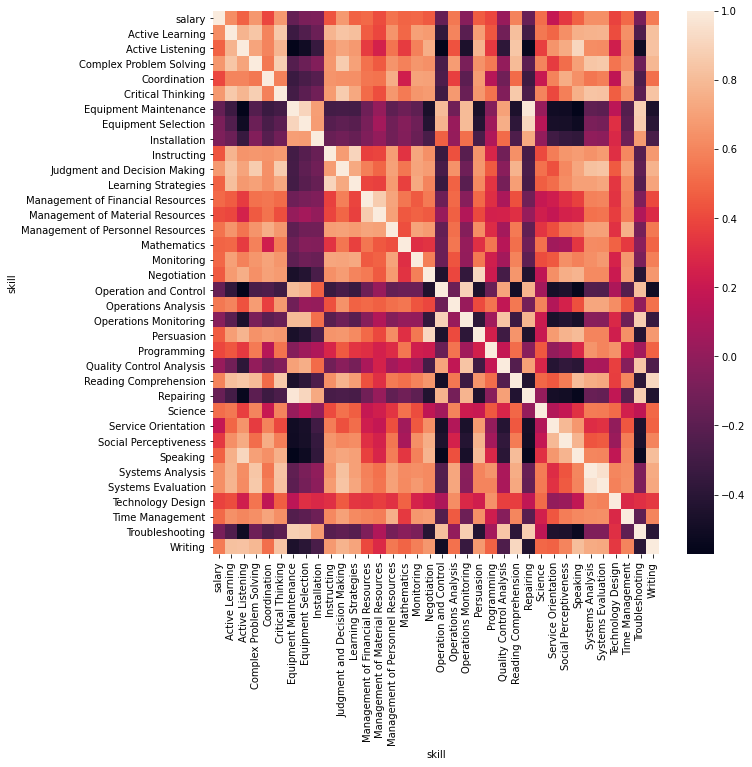

In [28]:
fig, ax=plt.subplots(figsize=(10, 10))
sns.heatmap(skills.corr());

In [29]:
manual_skills = skills[['Installation', 'Repairing', 'Equipment Maintenance', 'Equipment Selection']]
manual_skills.head()

skill,Installation,Repairing,Equipment Maintenance,Equipment Selection
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0


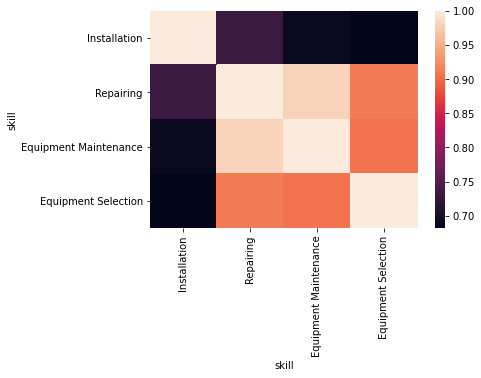

In [30]:
sns.heatmap(manual_skills.corr());

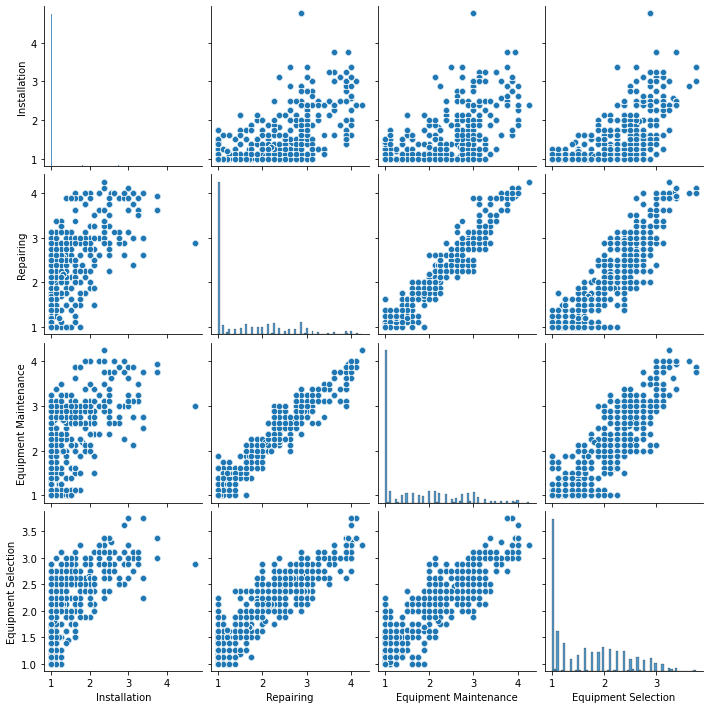

In [31]:
sns.pairplot(manual_skills);

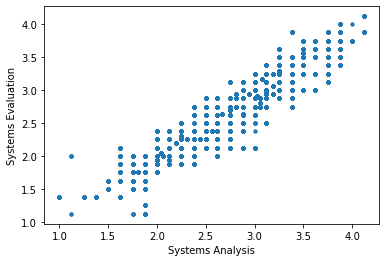

In [32]:
plt.plot(skills['Systems Analysis'], skills['Systems Evaluation'], marker='.', linestyle='none')
plt.xlabel('Systems Analysis')
plt.ylabel('Systems Evaluation');

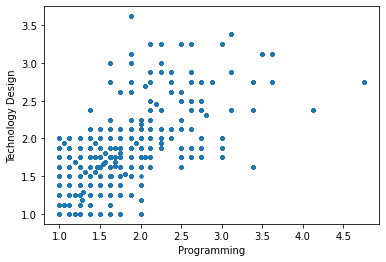

In [33]:
plt.plot(skills['Programming'], skills['Technology Design'], marker='.', linestyle='none')
plt.xlabel('Programming')
plt.ylabel('Technology Design');

In [34]:
learning_skills = skills[['Critical Thinking', 'Complex Problem Solving', 'Active Learning', 'Active Listening', 'Learning Strategies', 'Judgment and Decision Making']]
learning_skills.head()

skill,Critical Thinking,Complex Problem Solving,Active Learning,Active Listening,Learning Strategies,Judgment and Decision Making
0,3.88,3.44,3.31,3.94,2.94,3.5
1,3.88,3.44,3.31,3.94,2.94,3.5
2,3.88,3.44,3.31,3.94,2.94,3.5
3,3.88,3.44,3.31,3.94,2.94,3.5
4,3.88,3.44,3.31,3.94,2.94,3.5


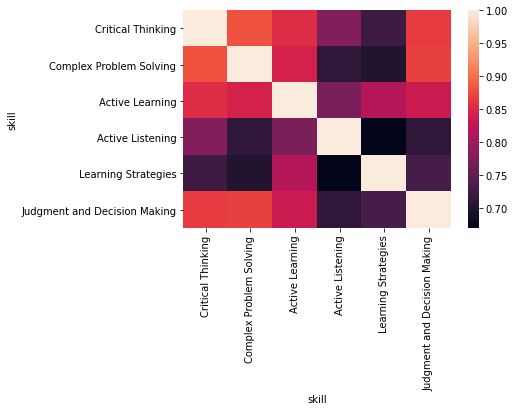

In [35]:
sns.heatmap(learning_skills.corr());

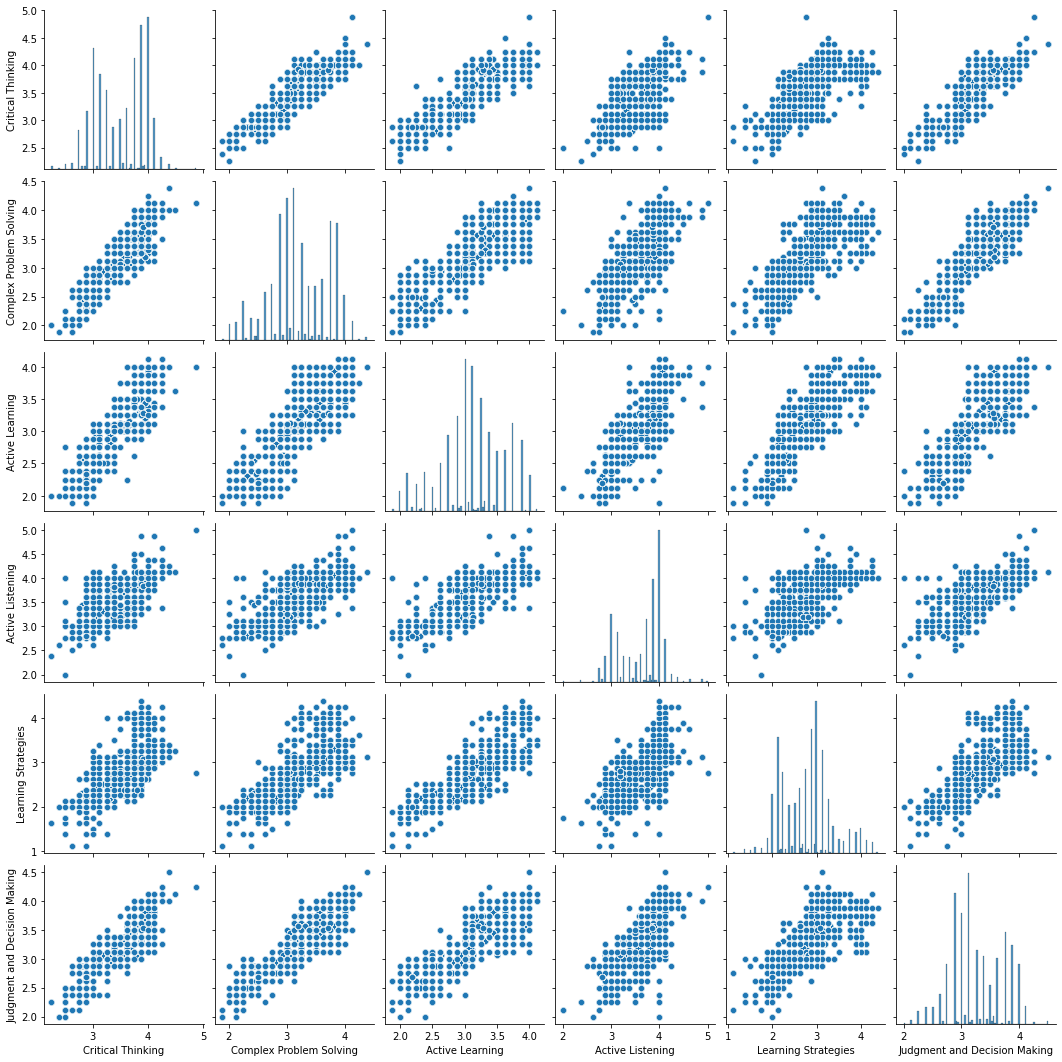

In [36]:
sns.pairplot(learning_skills);

In [37]:
salary_pca=PCA().fit(skills.set_index(['occupation','salary']))

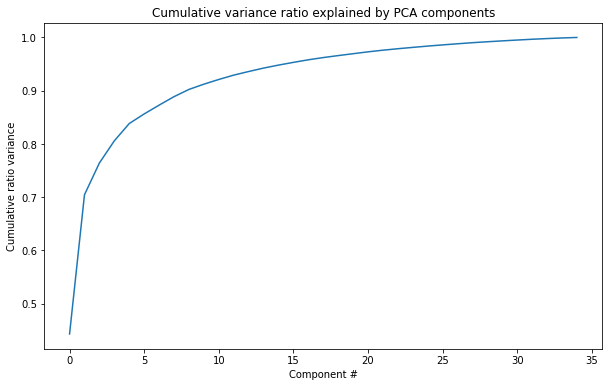

In [38]:
plt.subplots(figsize=(10, 6))
plt.plot(salary_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components');

In [39]:
salary_pca_x = salary_pca.transform(skills.set_index(['occupation','salary']))

In [40]:
salary_pca_x.shape

(129120, 35)